# Importing the Libraraies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Loading the dataset

In [ ]:
pima_data=pd.read_csv("/content/diabetes.csv")

In [ ]:
pima_data.shape#Wil give no of rows and column

(2071, 9)

In [ ]:
pima_data.columns# gives column name

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
pima_data.head()#gives starting 5 rows of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima_data.tail()#give ending 5 rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2066,1,173,74,0,0,36.8,0.088,38,1
2067,1,109,38,18,120,23.1,0.407,26,0
2068,1,108,88,19,0,27.1,0.400,24,0
2069,6,96,0,0,0,23.7,0.190,28,0
2070,1,124,74,36,0,27.8,0.100,30,0


In [ ]:
pima_data.info()#gives infomation about the datset like column data type ,count  ect


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2071 non-null   int64  
 1   Glucose                   2071 non-null   int64  
 2   BloodPressure             2071 non-null   int64  
 3   SkinThickness             2071 non-null   int64  
 4   Insulin                   2071 non-null   int64  
 5   BMI                       2071 non-null   float64
 6   DiabetesPedigreeFunction  2071 non-null   float64
 7   Age                       2071 non-null   int64  
 8   Outcome                   2071 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 145.7 KB


In [ ]:
pima_data.describe()#give statistical values of the numerical column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,3.869145,120.038629,69.366972,20.452438,77.254466,31.963351,0.461766,33.524867,0.332207
std,3.374638,32.035540,19.057795,16.215324,109.335063,7.583244,0.315999,11.992197,0.471118
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.238000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,22.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,126.000000,36.400000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
pima_data.isnull().sum()#gives sum of the null values present

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Dependent and independent variable
feature_col=["Pregnancies" ,"Glucose","BloodPressure" ,"SkinThickness" ,"Insulin" ,"BMI" ,"DiabetesPedigreeFunction" ,"Age"]
X = pima_data[feature_col]#Independent variable
y= pima_data.Outcome#dependent variable

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2066,1,173,74,0,0,36.8,0.088,38
2067,1,109,38,18,120,23.1,0.407,26
2068,1,108,88,19,0,27.1,0.400,24
2069,6,96,0,0,0,23.7,0.190,28


In [ ]:
y

0       1
1       0
2       1
3       0
4       1
       ..
2066    1
2067    0
2068    0
2069    0
2070    0
Name: Outcome, Length: 2071, dtype: int64

In [ ]:
#Splitting the data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [ ]:
#creating object of  decision tree 
classi=DecisionTreeClassifier()
#train the model 
classi.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predictiong the X_test value
y_pred=classi.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score:- ",accuracy_score(y_pred,y_test))

Accuracy score:-  0.9244372990353698


As we can see our model have very good accuracy.

**Let's View the Decision Tree for this**

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

For plotting tree, you also need to install graphviz and pydotplus.

pip install graphviz

pip install pydotplus

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on colab.

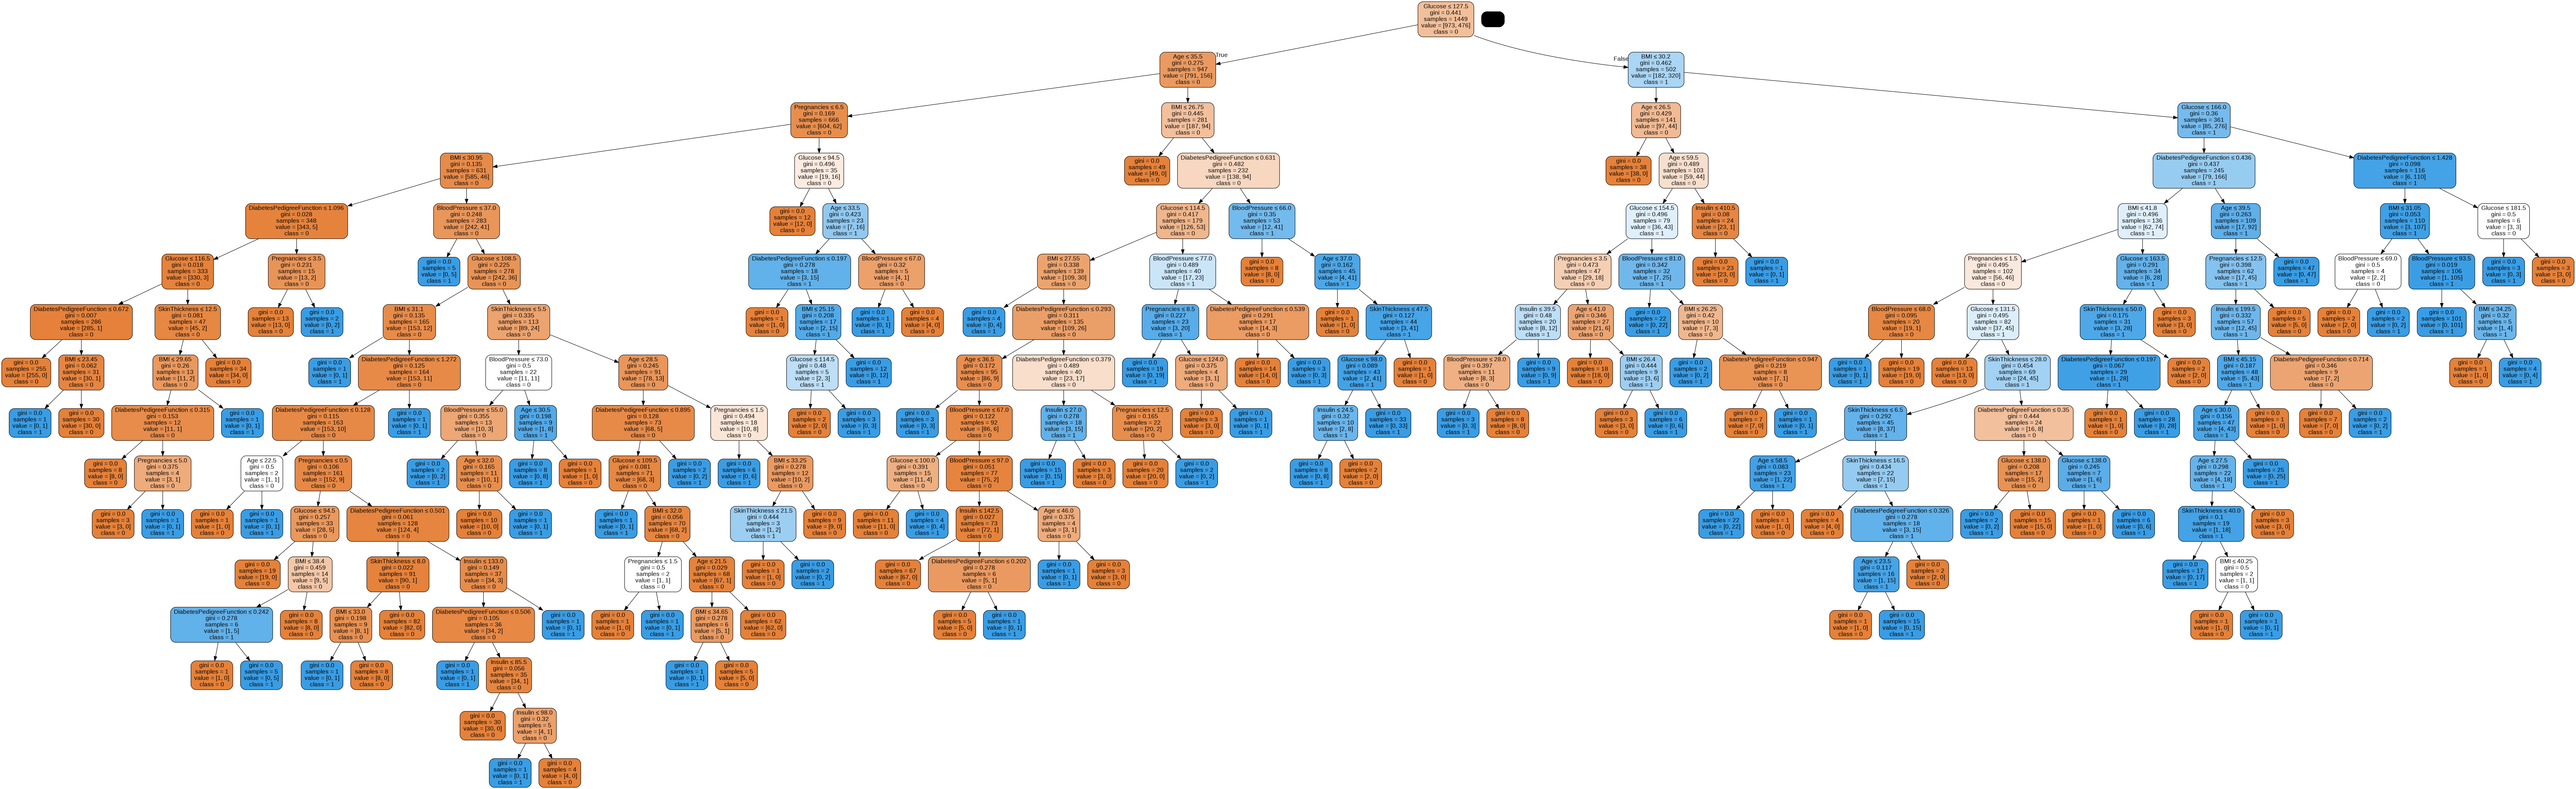

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()
export_graphviz(classi,out_file=dot_data,filled=True,rounded=True,special_characters=True,
                feature_names=feature_col,class_names=["0","1"])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png("content/image.png")
Image(graph.create_png())